In [3]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

## Read the article table 

In [7]:
df_articles = pd.read_csv(r'../data/df_articles.csv', encoding='utf8')

In [8]:
pattern = re.compile("http://[\w\d/\.]+jpg")
for i in xrange(df_articles.shape[0]):
    df_articles.loc[i]['images'] = re.findall(pattern, df_articles['images'][i])

## Clean the data

In [9]:
#concat all text fields into one
df_articles['all_text'] = df_articles['headline'] + " " + \
                          df_articles['sub_headline'] + " " +\
                          df_articles['article_text']

In [10]:
#clean the text, leave only alpha, num and space
pattern = re.compile(u"[^א-ת\w\d\s]")
df_articles['all_text'] = df_articles.apply(lambda row: re.sub(pattern, "", row['all_text']), axis=1)

## Explore the data 

### calculate word counts 

In [11]:
count_vectorizer = CountVectorizer()
words_counts = count_vectorizer.fit_transform(df_articles['all_text'])

In [12]:
df_words = pd.DataFrame(columns=['word','count'])
df_words['word'] = count_vectorizer.get_feature_names()
df_words['count'] = words_counts.sum(axis=0).A[0]

In [23]:
df_words.sort_values(by='count', ascending=[False]).head()

,word,count
655,את,717
11157,של,591
6494,לא,465
9744,על,382
6295,כי,298


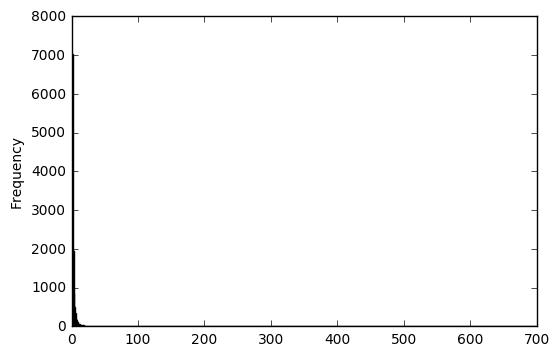

In [14]:
df_words['count'].plot(kind='hist', bins=xrange(700))
plt.show()

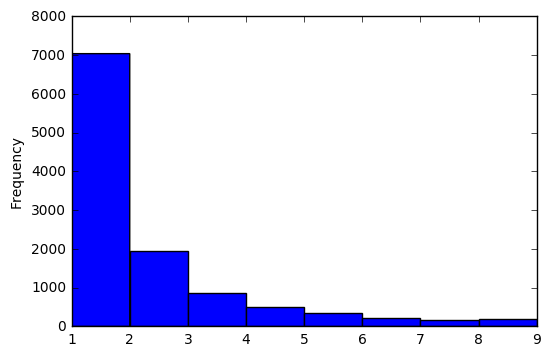

In [15]:
df_words['count'].plot(kind='hist', bins=xrange(1,10))
plt.show()

##  Tf-idf, SVD

In [16]:
tf_idf = TfidfVectorizer(min_df=1, max_df=9)

In [17]:
tf_idf_vectors = tf_idf.fit_transform(df_articles['all_text'])

In [18]:
svd = TruncatedSVD(n_components=30, n_iter=30, random_state=2016)

In [19]:
tf_idf_vectors = svd.fit_transform(tf_idf_vectors)

In [20]:
df_vectors = pd.DataFrame(tf_idf_vectors, columns=["tf_idf_" +str(x) for x in xrange(tf_idf_vectors.shape[1])])

In [21]:
df_vectors['headline'] = df_articles['headline']

In [22]:
df_vectors.to_csv(r'../data/df_vectors.csv', encoding='utf8', index=False)